# 보스턴 주택가격 데이터

|변수명|설명|
|------|----|
|CRIM|지역별 범죄 발생률|
|ZN|25,000평방피트를 초과하는 거주 지역의 비율|
|NDUS|비상업 지역 넓이 비율|
|CHAS|찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)|
|NOX|일산화질소 농도|
|RM|거주할 수 있는 방 개수|
|AGE|1940년 이전에 건축된 소유 주택의 비율|
|DIS|5개 주요 고용센터까지의 가중 거리|
|RAD|고속도로 접근 용이도|
|TAX|10,000달러당 재산세율|
|PTRATIO|지역의 교사와 학생 수 비율|
|B|지역의 흑인 거주 비율|
|LSTAT|하위 계층의 비율|
|PRICE|본인 소유의 주택 가격(중앙값)|

In [1]:
# 패키지 불러오기
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import warnings
from sklearn.datasets import fetch_openml
%matplotlib inline

In [3]:
# 데이터 불러오기

# 'B' 컬럼의 인종차별성 때문에 scikit-learn 0.24 버전부터는 데이터셋을 scikit-learn.datasets 패키지에서 제공하지 않음
# 대신 fetch_openml 함수를 사용하여 OpenML 웹사이트에서 Boston 데이터셋을 다운로드 가능
boston = fetch_openml(name = 'Boston', version = 1)
boston_df = boston.data
boston_df['PRICE'] = boston.target
boston_df.head()

C:\Anaconda3\envs\pythonEx\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
# 보스턴 데이터에서 본인 소유의 주택가격
boston.target_names

['MEDV']

In [6]:
boston.target

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [7]:
boston_df.shape

(506, 14)

In [8]:
# 변수 확인, null값은 없으나, CHAS, RAD의 Dtype이 category이므로 int로 변환 필요
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  PRICE    506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [9]:
# 'CHAS', 'RAD' 컬럼이 갖는 카테고리 값 확인
tmp_col_list = ['CHAS', 'RAD']
for col_nm in tmp_col_list:
    print('*', col_nm, ':', list(boston_df[col_nm].unique()))

* CHAS : ['0', '1']
* RAD : ['1', '2', '3', '5', '4', '8', '6', '7', '24']


In [10]:
boston_df['CHAS']

0      0
1      0
2      0
3      0
4      0
      ..
501    0
502    0
503    0
504    0
505    0
Name: CHAS, Length: 506, dtype: category
Categories (2, object): ['0', '1']

In [11]:
boston_df['RAD']

0      1
1      2
2      2
3      3
4      3
      ..
501    1
502    1
503    1
504    1
505    1
Name: RAD, Length: 506, dtype: category
Categories (9, object): ['1', '2', '24', '3', ..., '5', '6', '7', '8']

In [12]:
# CHAS, RAD의 Dtype을 int로 변환
for col_nm in tmp_col_list:
    boston_df[col_nm] = boston_df[col_nm].astype('int64')
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


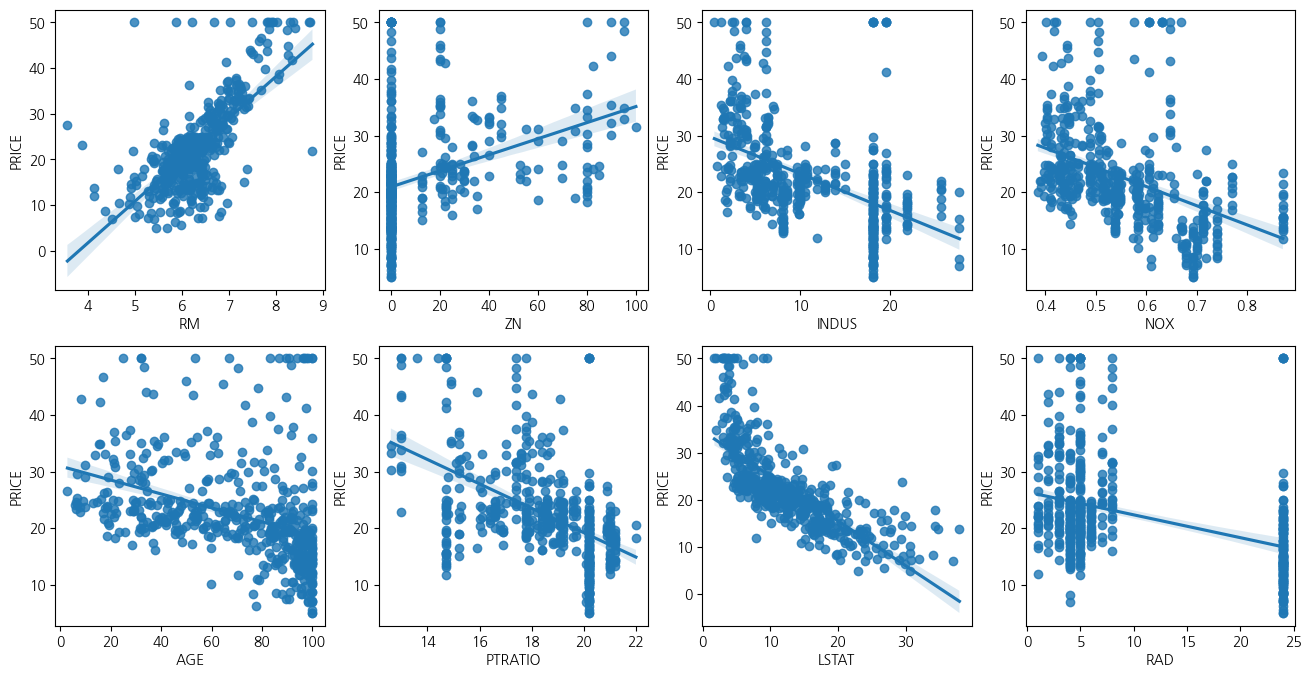

In [14]:
# 시각화
# 4개의 열과 2개의 행을 가진 서브플릇 그리드 생성
fig, axs = plt.subplots(figsize = (16, 8), ncols = 4, nrows = 2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
# enumerate()함수를 사용하여 피처의 인덱스와 값을 가지고 옴
for i, feature in enumerate(lm_features):
    row = int(i / 4)
    col = i % 4
    # 산점도와 회귀직선 그려주는 함수
    sns.regplot(x = feature, y = 'PRICE', data = boston_df, ax = axs[row][col])
fig1 = plt.gcf()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = boston_df['PRICE']

# 'PRICE'열 삭제, 원본 데이터에는 영향을 주지 않도록 inplace = False
X_data = boston_df.drop(['PRICE'], axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3, random_state = 46)

# Linear Regression OLS로 학습/예측/평가 수행
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE: {0:.3f}, RMSE {1:.3f}'.format(mse, rmse))
print('Variance score: {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE: 16.140, RMSE 4.017
Variance score: 0.787


In [20]:
# 모델이 학습을 통해 찾아낸 절편(b) 및 가중치(W_i)값 확인
print('절편 값: ', lr.intercept_)
print('가중치 값: ',np.round(lr.coef_, 1))

절편 값:  38.40608551441195
가중치 값:  [ -0.1   0.1  -0.    2.9 -20.9   3.7  -0.   -1.8   0.3  -0.   -0.8   0.
  -0.5]


In [21]:
# 회귀계수를 큰 값 순으로 정렬
coeff = pd.Series(np.round(lr.coef_, 1), index = X_data.columns)
coeff.sort_values(ascending = False)

RM          3.7
CHAS        2.9
RAD         0.3
ZN          0.1
INDUS      -0.0
AGE        -0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.5
PTRATIO    -0.8
DIS        -1.8
NOX       -20.9
dtype: float64

In [23]:
# cross_val_score 이용한 MSE,RMSE 산출
from sklearn.model_selection import cross_val_score

y_target = boston_df['PRICE']
X_data = boston_df.drop('PRICE', axis = 1)
lr = LinearRegression()

# cross_val_score()의 5 fold set로 MSE를 구한 후, 이를 기반으로 RMSE 산출
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# 결과출력
print('# * -1을 취해주기 전 5 folds의 개별 Negative MSE Scores:', np.round(neg_mse_scores, 2))
print('# 5 folds의 개별 MSE Scores:', np.round(-1 * neg_mse_scores, 2))
print('# 5 folds의 개별 RMSE Scores:', np.round(rmse_scores, 2))
print('# 5 folds의 평균 RMSE: {:.3f}'.format(avg_rmse))

# * -1을 취해주기 전 5 folds의 개별 Negative MSE Scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
# 5 folds의 개별 MSE Scores: [12.46 26.05 33.07 80.76 33.31]
# 5 folds의 개별 RMSE Scores: [3.53 5.1  5.75 8.99 5.77]
# 5 folds의 평균 RMSE: 5.829
